# Study $p_T$ in the generator level
last edit July-18, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/04
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
clasdis_path = '/Users/erezcohen/Desktop/data/BAND/CLASDIS/eventfiles/our_kinematics/';
claspyth_path = '/Users/erezcohen/Desktop/data/BAND/CLASPYTH/eventfiles/our_kinematics/';
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/'

# (1) Load simulation files and apply kinematical selection cuts

## (1.1) CLASDIS

In [4]:
e_e_pi_clasdis = dict()

for runnum in range(1):
    xsec_nb = 14.91
    df_pips = pd.read_csv(clasdis_path + 'clasdisde.00.e10.600.emn0.75tmn.09.xs%.2fnb.dis.000%d_pips.csv'%(xsec_nb,runnum));
    df_pims = pd.read_csv(clasdis_path + 'clasdisde.00.e10.600.emn0.75tmn.09.xs%.2fnb.dis.000%d_pims.csv'%(xsec_nb,runnum));
    if runnum==0:
        xsec_clasdis = xsec_nb;
        e_e_pi_clasdis['piplus']  = df_pips
        e_e_pi_clasdis['piminus'] = df_pims
    else:
        e_e_pi_clasdis['piplus']  = pd.concat([e_e_pi_clasdis['piplus'] ,df_pips])
        e_e_pi_clasdis['piminus'] = pd.concat([e_e_pi_clasdis['piminus'],df_pims])
    
print('Loaded %d π+ events and %d π- events'%(len(e_e_pi_clasdis['piplus']),len(e_e_pi_clasdis['piminus'])))

Loaded 1182445 π+ events and 1139738 π- events


In [5]:
e_e_pi_clasdis_after_Mx_cut      = apply_Mx_cut( e_e_pi_clasdis )
e_e_pi_clasdis_after_Kinematical_cuts = apply_Kinematical_cuts( e_e_pi_clasdis_after_Mx_cut, W_min=2.5 )
e_e_pi_clasdis_pass_cuts         = e_e_pi_clasdis_after_Kinematical_cuts;

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2


In [6]:
print('Retained %d π+ events and %d π- events'%(len(e_e_pi_clasdis_pass_cuts['piplus']),len(e_e_pi_clasdis_pass_cuts['piminus'])))

Retained 203605 π+ events and 146525 π- events


## (1.1) CLASPYTH
Since with CLASPYTH we can not simulate a deuteron target, we merge the simulations of a proton and a neutron targets

In [7]:
e_e_pi_claspyth = dict()

for runnum in range(1):
    
    # neutron target
    xsec_n_nb = 0
    df_n_pips = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_n_nb));
    df_n_pims = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_n_nb));
    # proton target
    xsec_p_nb = 0
    df_p_pips = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_p_nb));
    df_p_pims = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_p_nb));

    # merge - deuteron target
    xsec_d_nb = xsec_n_nb + xsec_p_nb;
    df_pips = pd.concat([df_n_pips, df_p_pips])
    df_pims = pd.concat([df_n_pims, df_p_pims])
    
    if runnum==0:
        xsec_claspyth = xsec_d_nb;
        e_e_pi_claspyth['piplus']  = df_pips
        e_e_pi_claspyth['piminus'] = df_pims
    else:
        e_e_pi_claspyth['piplus']  = pd.concat([e_e_pi_claspyth['piplus'] ,df_pips])
        e_e_pi_claspyth['piminus'] = pd.concat([e_e_pi_claspyth['piminus'],df_pims])
    
print('Loaded %d π+ events and %d π- events'%(len(e_e_pi_claspyth['piplus']),len(e_e_pi_claspyth['piminus'])))

Loaded 10768393 π+ events and 10581247 π- events


In [8]:
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    e_e_pi_claspyth[pi_ch]["pi_DC_sector"]    = 1
e_e_pi_claspyth_after_acceptance_matching_cut = apply_p_theta_acceptance_cut_single_set( e_e_pi_claspyth )

Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus which includes 10768393 events
Applying p-theta on cut for piplus on 10768393 events
10768393 in sector 1
0 in sector 2
0 in sector 3
0 in sector 4
0 in sector 5
0 in sector 6
Applying p-theta on cut for piminus which includes 10581247 events
Applying p-theta on cut for piminus on 10581247 events
10581247 in sector 1
0 in sector 2
0 in sector 3
0 in sector 4
0 in sector 5
0 in sector 6


In [9]:
e_e_pi_claspyth_after_Mx_cut                  = apply_Mx_cut( e_e_pi_claspyth_after_acceptance_matching_cut )
e_e_pi_claspyth_after_Kinematical_cuts        = apply_Kinematical_cuts( e_e_pi_claspyth_after_Mx_cut, W_min=2.5 )
e_e_pi_claspyth_pass_cuts                     = e_e_pi_claspyth_after_Kinematical_cuts;

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2


In [10]:
print('Retained %d π+ events and %d π- events'%(len(e_e_pi_claspyth_pass_cuts['piplus']),len(e_e_pi_claspyth_pass_cuts['piminus'])))

Retained 2073830 π+ events and 1515932 π- events


# (2) Auxliary

In [11]:
import scipy as sp
from scipy.stats import chi

def fit_function_pT( x, mu_Px=0, sigma_Px=0.2 ):
    '''
    The Chi distribution is the positive square root of the sum of squares of independent random variables,
    each following a standard normal distribution:
    
        Z = sqrt(X_1^2 + X_2^2 + X_3^2 + X_4^2 + .....)
    
    For k=2, this is the function that represents the distribution of 
    
        p_T = \sqrt(Px^2 + Py^2)
        
    where Px and Py are Gaussians,
    assuming mu_Py = mu_Px, and sigma_Py = sigma_Px.
    
    '''
    rv = chi(2, mu_Px, sigma_Px)    
    y_fit = rv.pdf(x)
    y_fit_normed = y_fit/np.sum(y_fit)
    return y_fit_normed


def fit_pT( x, y, y_err, fdebug=0, do_plot_fit=False, color='k' ):
    '''
    return 
    -------
    fit_results     dict
    '''
    
    fit_results = dict()
    if np.max(y)>0:
        popt,pcov=sp.optimize.curve_fit(fit_function_pT, xdata=x, ydata=y, p0=[np.mean(x[x<0.5]),np.std(x)], ) # sigma=y_err, 
        mu_fit  = popt[0]
        mu_err  = np.sqrt(pcov[0,0])
        if mu_err ==np.inf: mu_err  = np.max([mu_fit ,0.01])
        sig_fit = popt[1]
        sig_err = np.sqrt(pcov[1,1])
        if sig_err==np.inf: sig_err = np.max([sig_fit ,0.01])
    else:
        mu_fit,mu_err,sig_fit,sig_err = 0,0,0,0

    fit_results['mu_fit'] = mu_fit
    fit_results['mu_err'] = mu_err
    fit_results['sig_fit'] = sig_fit
    fit_results['sig_err'] = sig_err
    
    if fdebug>1:
        print(mu_fit , mu_err)
        print(sig_fit, sig_err)
        
    if do_plot_fit:
        x_fit = np.linspace(np.min(x),np.max(x),100)
        plt.plot( x_fit, fit_function_pT( x_fit, mu_fit , sig_fit )*len(x_fit)/len(x), '--', color=color );
    return fit_results

In [25]:
def plot_pT2(df_dict = e_e_pi_claspyth_pass_cuts, bins = np.linspace(0,1.3,31), 
             Q2min=0, Q2max=10, 
             xBmin=0, xBmax=2,              
             Zmin=0,  Zmax=1, 
             ylim_ratio=None):
    
    pi_class_labels = ['direct','non-diffractive $\\rho$','diffractive $\\rho$']
    pi_class_colors = ['forestgreen' , 'salmon',                'royalblue'          ]



    fig = plt.figure(figsize=(11,7),tight_layout=True); 
    h,h_all,h_err,h_all_err = dict(),dict(),dict(),dict()
    for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
        ax = fig.add_subplot(3,2,(pi_idx,pi_idx+2))
        df = df_dict[pi_ch]
        # df = df[df.pi_Z > 0.3]
        df = df[ (Q2min<df.Q2)   & (df.Q2<Q2max)                 
                &(xBmin<df.xB)   & (df.xB<xBmax)                            
                &(Zmin <df.pi_Z) & (df.pi_Z<Zmax)]


        pi_from_rho      = df[(df.pi_parent_PDG==113)|(df.pi_parent_PDG==213)|(df.pi_parent_PDG==-213)]
        pi_direct[pi_ch] = df[(df.pi_parent_PDG==2)  |(df.pi_parent_PDG==-2) |(df.pi_parent_PDG==91)  |(df.pi_parent_PDG==92)|(df.pi_parent_PDG==93)]


        M_x_rho             = pi_from_rho.M_x_rho
        diffractive_rho     = pi_from_rho[pi_from_rho.M_x_rho < Mx_diffractive]
        non_diffractive_rho = pi_from_rho[Mx_diffractive < pi_from_rho.M_x_rho ]

        pi_from_diffractive_rho[pi_ch]     = diffractive_rho
        pi_from_non_diffractive_rho[pi_ch] = non_diffractive_rho

        pT2 = np.square(df.pi_qFrame_pT)
        x,h_all[pi_ch+'all'],x_err,h_all_err[pi_ch+'all'] = plot_step_squares( pT2, ax=ax, bins=bins, color='k', label='all $'+pi_labels[pi_idx-1]+'$' )


        pi_classes = [ pi_direct[pi_ch], pi_from_non_diffractive_rho[pi_ch], pi_from_diffractive_rho[pi_ch]]
        for pi_class,label,color in zip(pi_classes, pi_class_labels, pi_class_colors):
            pT2 = np.square(pi_class.pi_qFrame_pT)
            plot_step_hist( pT2, bins=bins, color=color, label=None, do_plot_errorbar=False, do_plot_step=False )
            x,h[pi_ch+label],x_err,h_err[pi_ch+label] = plot_step_squares( pT2, ax=ax, bins=bins, color=color, label=label )

        set_axes(ax,'$(\;p_T\;)^2$ [(GeV/c)$^2$]','',title='$'+pi_labels[pi_idx-1]+'$',fontsize=16,do_add_grid=True,do_add_legend=True,xlim=(0,1.3),ylim=(1e1,np.max(h_all[pi_ch+'all'])));
        ax.set_yscale('log')
        
    ax = fig.add_subplot(3,2,(5,6))
    ymax = 0
    for pi_class,label,color in zip(pi_classes, pi_class_labels, pi_class_colors):
        R = h['piplus'+label]/h['piminus'+label]
        R_err = R * np.sqrt( np.square(h_err['piplus'+label]/h['piplus'+label]) + np.square(h_err['piminus'+label]/h['piminus'+label]))
        ax.errorbar(x, R, R_err , marker='s', color=color, linestyle='None', capsize=2)
        if max(R+R_err) > ymax: ymax = max(R+R_err)
        
    if ylim_ratio == None: ylim_ratio = (0.1,1.1*ymax)
    set_axes(ax,'$(\;p_T\;)^2$ [(GeV/c)$^2$]','$\pi^+/\pi^-$',fontsize=16,do_add_grid=True,do_add_legend=False,xlim=(0,1.3),ylim=ylim_ratio);
    # ax.set_yscale('log')


# (3) Plot $p_T$ 

## (3.1) Separate samples to three sub-classes:
#### (1) pions prodcued directly from quarks
#### (2) pions prodcued from VM that were non-diffractive (nuclear fragmentation)
#### (3) pions produced from diffractive rho production 

### (3.1.1) pion parent

[-313    0   91   92  113  213  221  223  310  323  331  333 2214 2224
 3222 3224]
[-323 -213    0   22   91   92  113  221  223  310  313  331  333 1114
 2114 3112 3114]


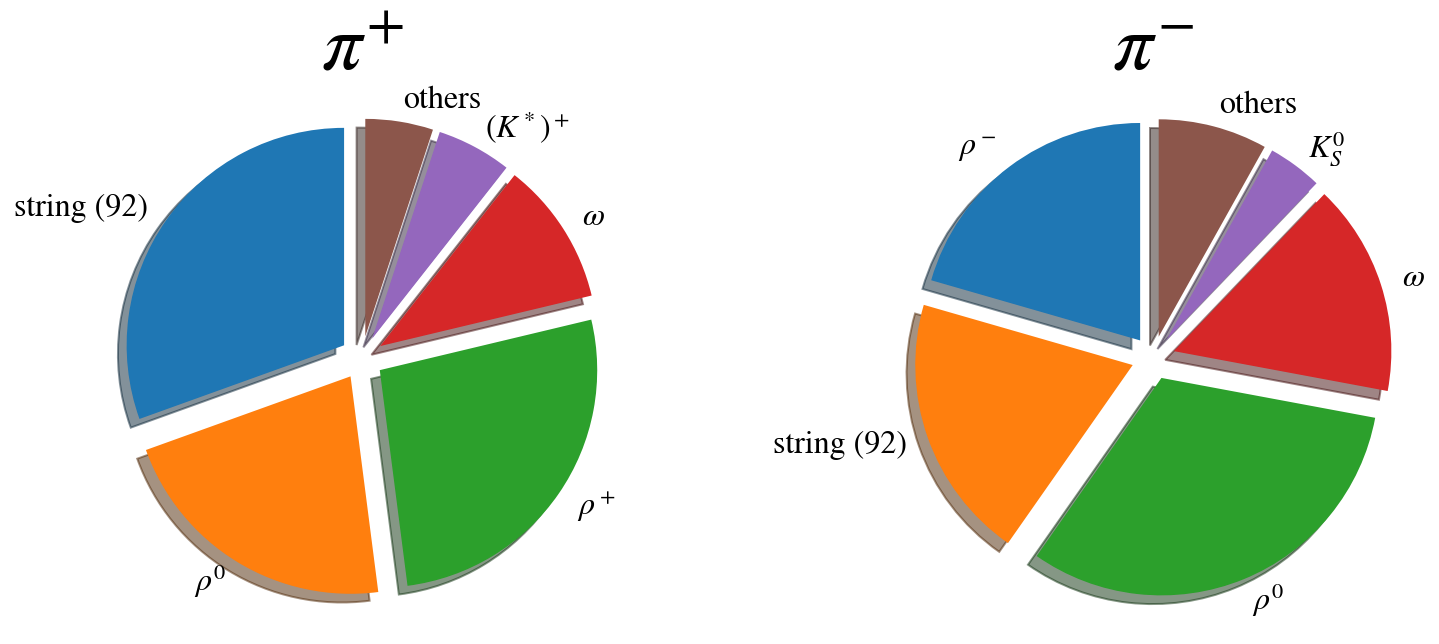

In [43]:
df_dict = e_e_pi_claspyth_pass_cuts
fig = plt.figure(figsize=(13,5)); 
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df = df_dict[pi_ch]
    df = df[df.pi_Z > 0.3]
    ax = fig.add_subplot(1,2,pi_idx)

    parents = np.unique(df.pi_parent_PDG);
    parent_frequencies = []
    parent_pdgs        = []
    parent_labels      = []
    others_frequency   = 0;
    for parent in parents:
        frequency = 100.*float(len(df[df.pi_parent_PDG==parent]))/len(df);
        if frequency>4:
            parent_frequencies.append(frequency);
            parent_labels.append(PDG2Particle(parent));
            parent_pdgs.append(parent);
        else:
            others_frequency = others_frequency + frequency
    parent_frequencies.append(others_frequency)
    parent_labels.append('others');

    plt.pie(parent_frequencies, labels = parent_labels,textprops={'fontsize':16},
            explode=0.1*np.ones(len(parent_frequencies)), 
            # autopct='%1.1f%%', 
            shadow=True,
            startangle=90);
    ax.set_title('$'+pi_labels[pi_idx-1]+'$',fontsize=40)
    print(parents)

### (3.1.2) pion from $\rho$ production - diffractive or non-diffractive

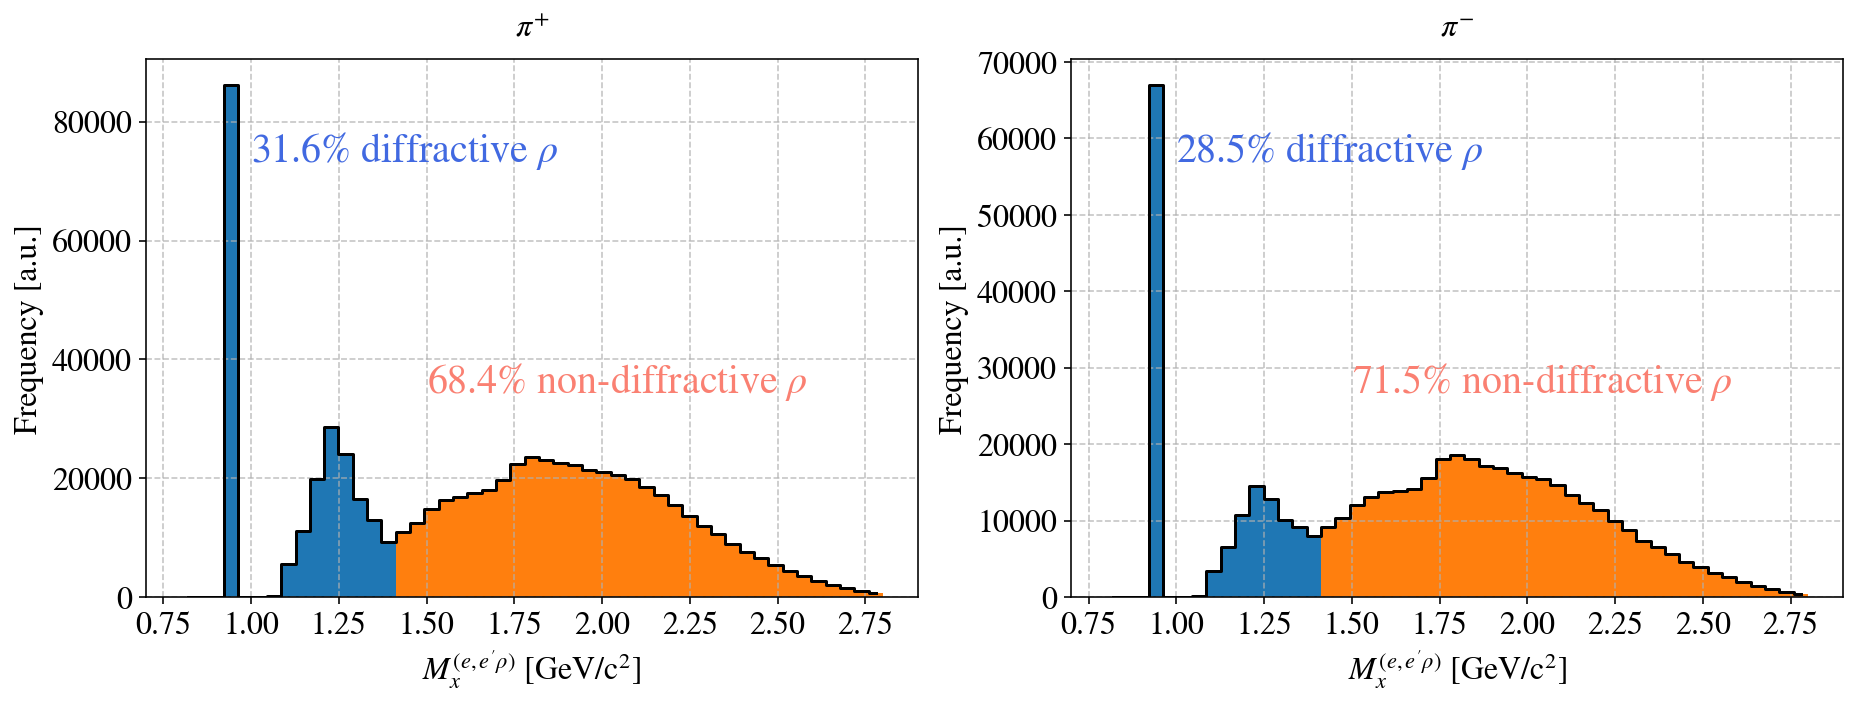

In [24]:
Mx_diffractive = 1.4; # GeV/c2
pi_direct                   = dict()
pi_from_diffractive_rho     = dict()
pi_from_non_diffractive_rho = dict()

fig = plt.figure(figsize=(13,5),tight_layout=True); 
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df = df_dict[pi_ch]
    df = df[df.pi_Z > 0.3]

    pi_from_rho = df[(df.pi_parent_PDG==113)|(df.pi_parent_PDG==213)|(df.pi_parent_PDG==-213)]
    
    M_x_rho             = pi_from_rho.M_x_rho
    diffractive_rho     = pi_from_rho[pi_from_rho.M_x_rho < Mx_diffractive]
    non_diffractive_rho = pi_from_rho[Mx_diffractive < pi_from_rho.M_x_rho ]
    
    pi_direct[pi_ch]                   = df[(df.pi_parent_PDG==2)|(df.pi_parent_PDG==-2)|(df.pi_parent_PDG==91)|(df.pi_parent_PDG==92)|(df.pi_parent_PDG==93)]
    pi_from_diffractive_rho[pi_ch]     = diffractive_rho
    pi_from_non_diffractive_rho[pi_ch] = non_diffractive_rho
    
    ax = fig.add_subplot(1,2,pi_idx)
    h,edges = np.histogram( M_x_rho, bins=np.linspace(0.8,2.8,50) )
    Mx       = (edges[1:]+edges[0:-1])/2
    bin_size = (edges[1:]-edges[0:-1]) 
    

    
    ax.step( Mx, h , where='mid', color='k' )
    ax.bar( Mx[Mx < Mx_diffractive],  h[Mx < Mx_diffractive], width=bin_size[Mx < Mx_diffractive] )
    plt.text(1, 0.85*np.max(h[Mx < Mx_diffractive]), '%.1f%% diffractive $\\rho$'%(100.*len(diffractive_rho)/len(pi_from_rho)), color='royalblue', fontsize=20)

    ax.bar( Mx[Mx > Mx_diffractive],  h[Mx > Mx_diffractive], width=bin_size[Mx > Mx_diffractive] )
    plt.text(1.5, 0.4*np.max(h[Mx < Mx_diffractive]), '%.1f%% non-diffractive $\\rho$'%(100.*len(non_diffractive_rho)/len(pi_from_rho)), color='salmon', fontsize=20)


    # ax.hist
    set_axes(ax,"$M_x^{(e,e'\\rho)}$ [GeV/c$^2$]",'Frequency [a.u.]',title='$'+pi_labels[pi_idx-1]+'$',fontsize=16,do_add_grid=True)

## (3.2) $p_T^2$  in kinematical bins

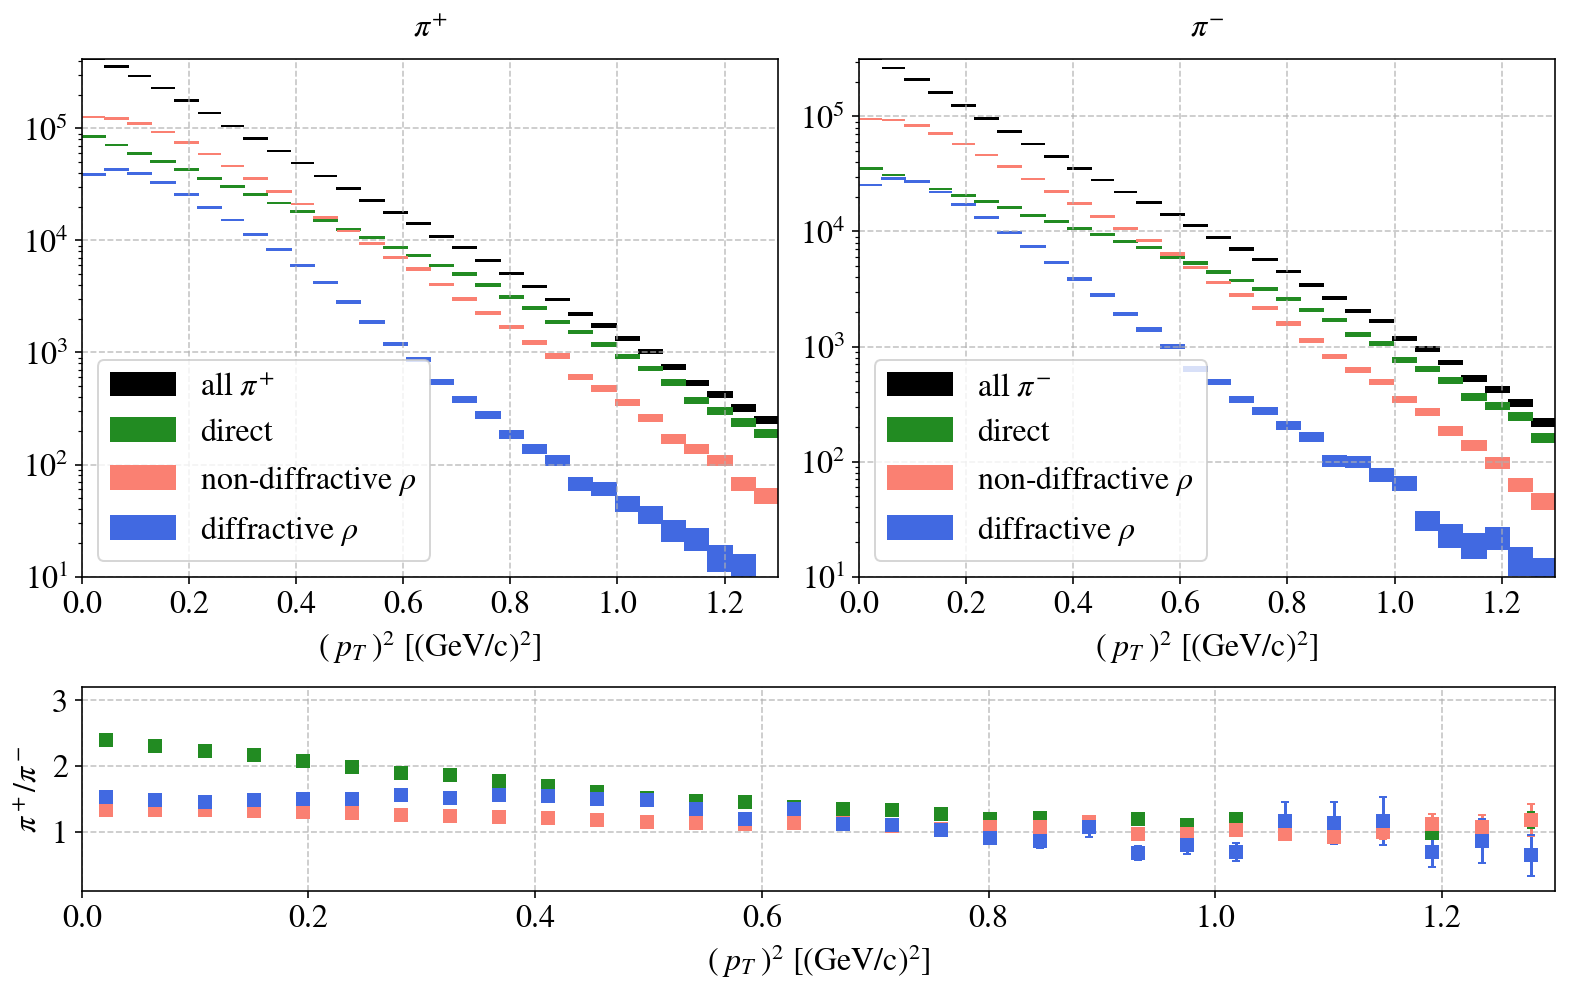

In [26]:
plot_pT2( bins = np.linspace(0,1.3,31), ylim_ratio=(0.1,3.2))

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_55977/2673451760.py:51: RuntimeWarning: invalid value encountered in true_divide
  R_err = R * np.sqrt( np.square(h_err['piplus'+label]/h['piplus'+label]) + np.square(h_err['piminus'+label]/h['piminus'+label]))


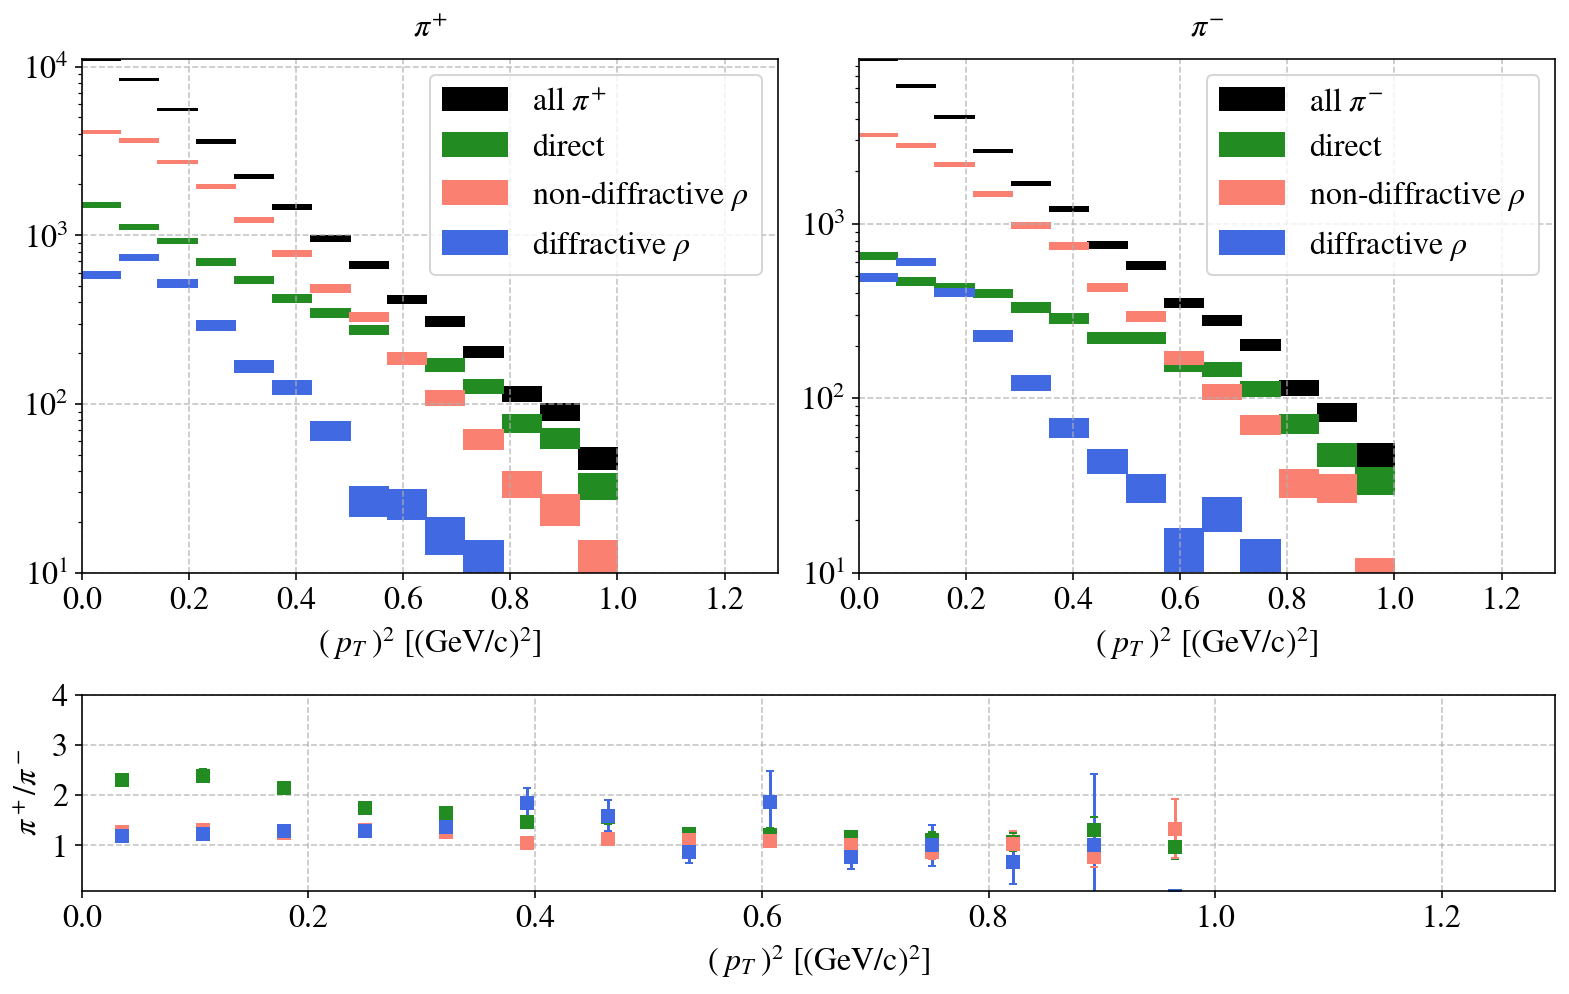

In [27]:
plot_pT2(Q2min=2, Q2max=2.5, 
         xBmin=0.2, xBmax=0.24,
         Zmin=0.3,  Zmax=0.35, 
         bins = np.linspace(0,1.,15), ylim_ratio=(0.1,4))

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_55977/2673451760.py:51: RuntimeWarning: invalid value encountered in true_divide
  R_err = R * np.sqrt( np.square(h_err['piplus'+label]/h['piplus'+label]) + np.square(h_err['piminus'+label]/h['piminus'+label]))


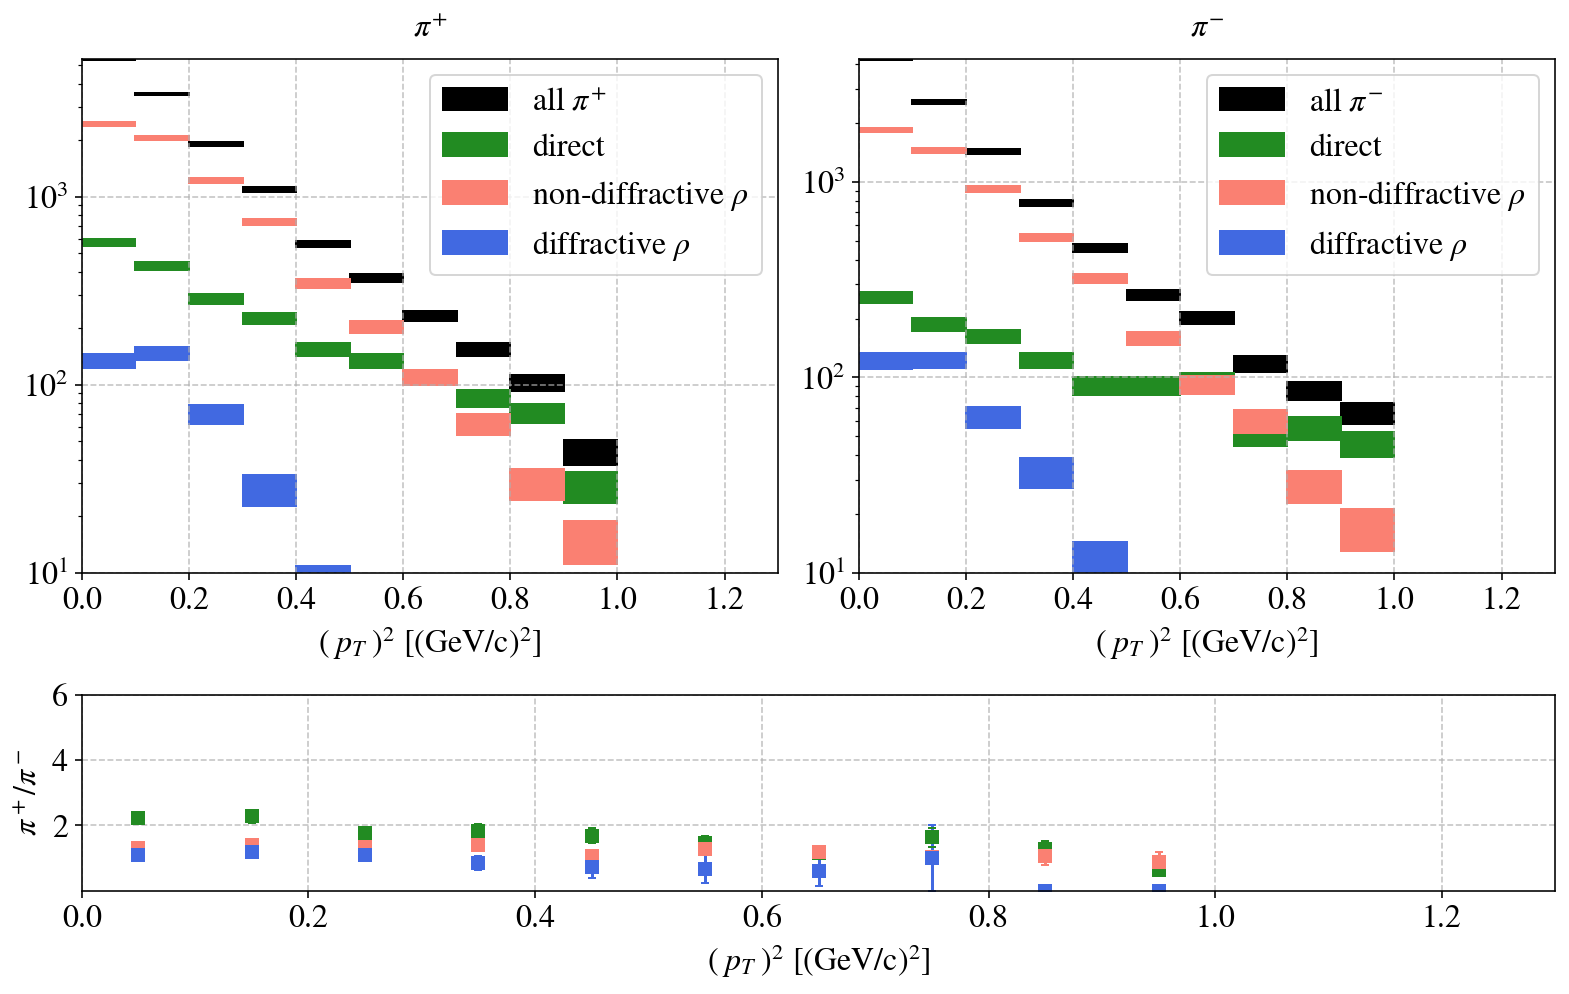

In [28]:
plot_pT2(Q2min=3, Q2max=3.5, 
         xBmin=0.24, xBmax=0.28,
         Zmin=0.3,  Zmax=0.35, 
         bins = np.linspace(0,1.,11), 
         ylim_ratio=(0.01,6))

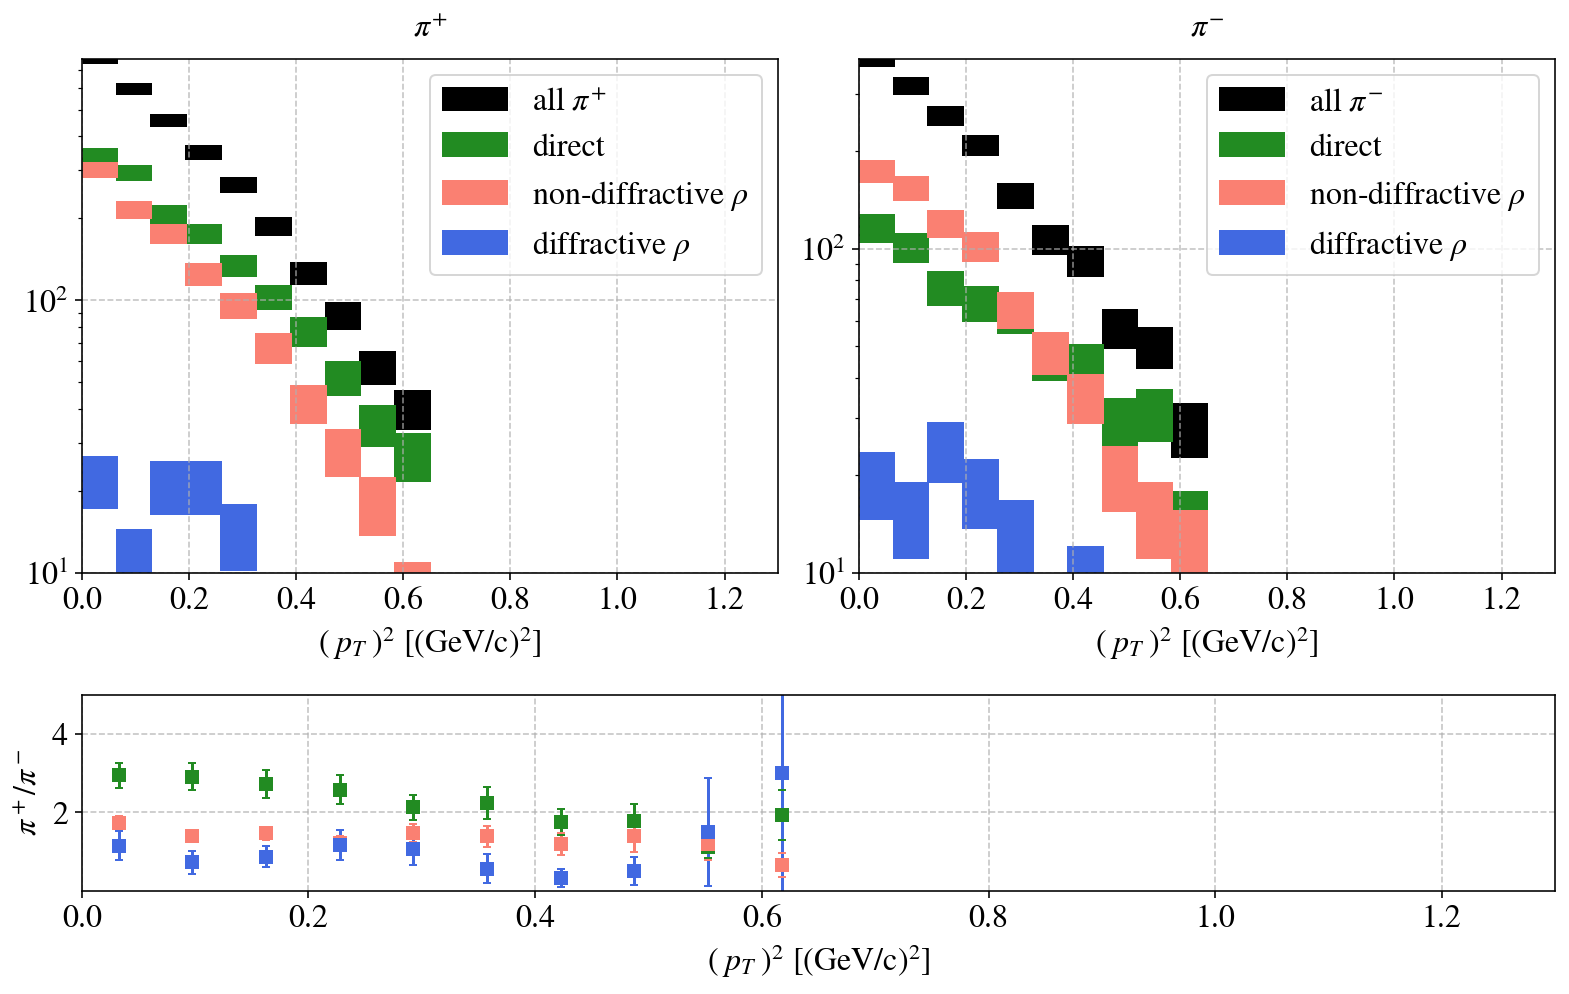

In [29]:
plot_pT2(Q2min=4, Q2max=4.5, 
         xBmin=0.3, xBmax=0.34,
         Zmin=0.5,  Zmax=0.55, 
         bins = np.linspace(0,0.65,11),
         ylim_ratio=(0.01,5))

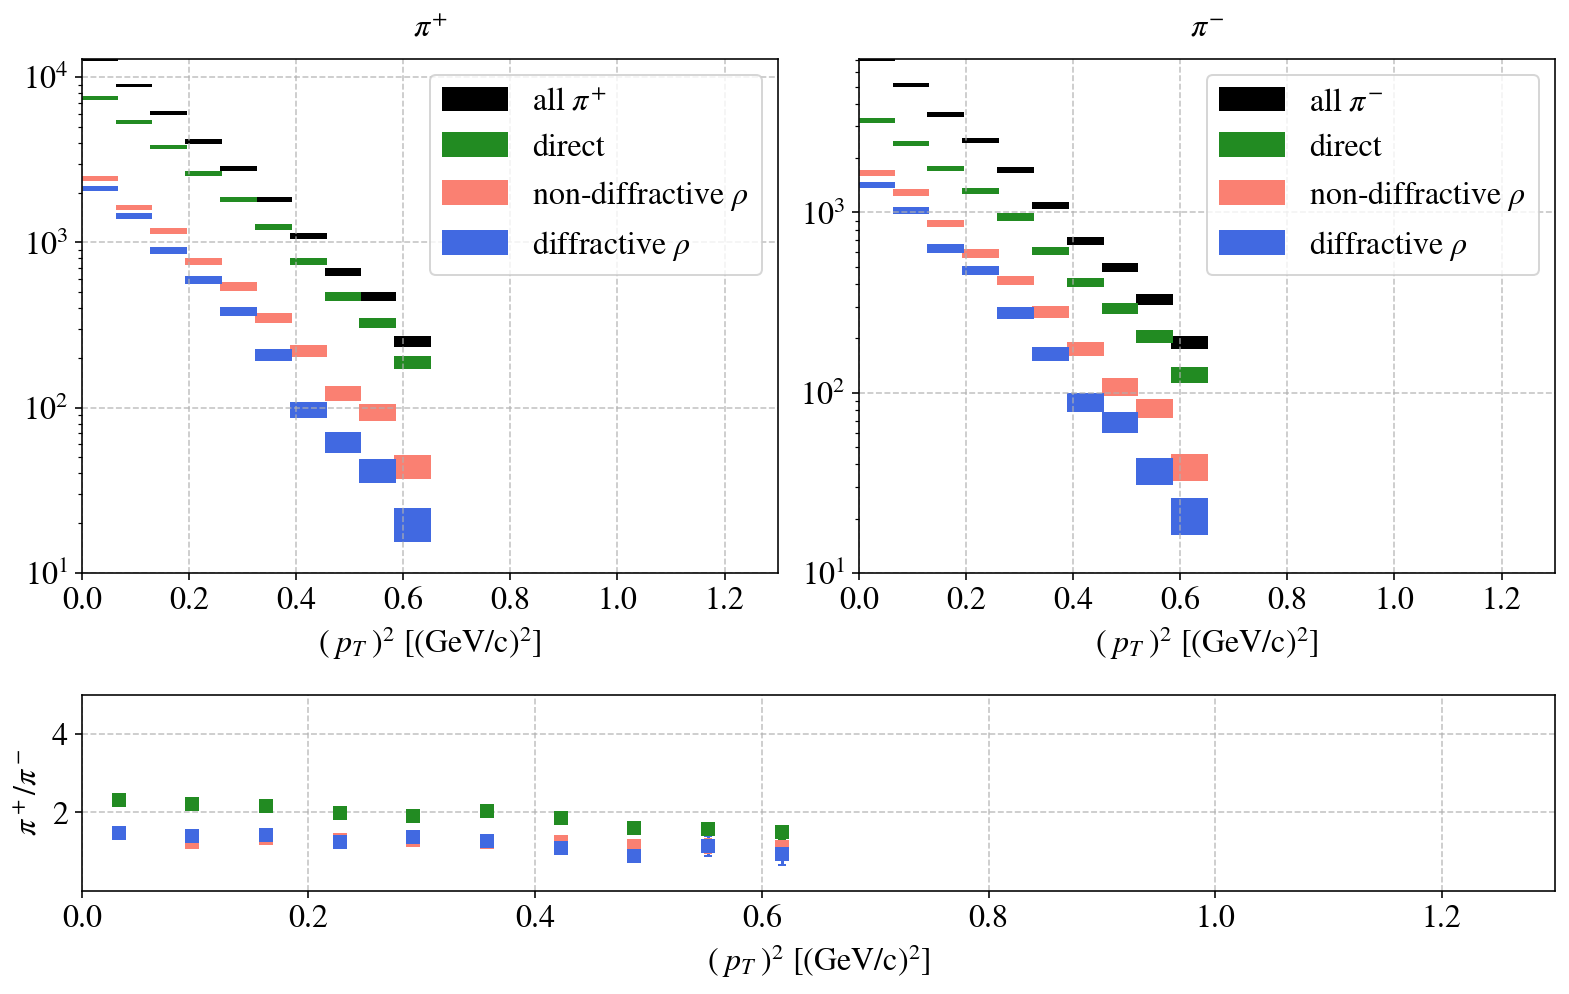

In [30]:
plot_pT2(Q2min=3,   Q2max=5, 
         xBmin=0.25, xBmax=0.4,
         Zmin=0.6,  Zmax=0.8, 
         bins = np.linspace(0,0.65,11),
         ylim_ratio=(0.01,5))

# Quantify the correction factor for $\pi^+/\pi^-$

In [69]:
def compute_non_direct_pips_to_pims_correction(df_dict = e_e_pi_claspyth_pass_cuts, 
                                               Q2min=0, Q2max=10, 
                                               xBmin=0, xBmax=2,
                                               Zmin =0,  Zmax=1, 
                                               pTmin=0, pTmax=1):
    '''
    
    [output] = compute_non_direct_pips_to_pims_correction(
                                               df_dict = e_e_pi_claspyth_pass_cuts, 
                                               Q2min=0, Q2max=10, 
                                               xBmin=0, xBmax=2,
                                               Zmin =0,  Zmax=1, 
                                               pTmin=0, pTmax=1)
    
    Compute the correction for non-direct pion production,
    i.e. (e,e'π) events from vector meson production (diffractive or non-diffractive)
    
    '''
    
    Ntot, Ndirect          = dict(),dict()
    f_direct, f_direct_err = dict(),dict()
    corr, corr_err         = dict(),dict()
    
    for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
        df = df_dict[pi_ch]
        df = df[ (Q2min<df.Q2)            & (df.Q2<Q2max)                 
                &(xBmin<df.xB)            & (df.xB<xBmax)                            
                &(Zmin <df.pi_Z)          & (df.pi_Z<Zmax)                            
                &(pTmin<df.pi_qFrame_pT)  & (df.pi_qFrame_pT<pTmax)]
        
        pi_direct[pi_ch] = df[(df.pi_parent_PDG==2)    
                              |(df.pi_parent_PDG==-2) 
                              |(df.pi_parent_PDG==91)  
                              |(df.pi_parent_PDG==92)
                              |(df.pi_parent_PDG==93)]
        
        Ntot[pi_ch]         = np.max([0,float(len(df))]);
        Ndirect[pi_ch]      = np.max([0,float(len(pi_direct[pi_ch]))]);


        f_direct[pi_ch]     = Ndirect[pi_ch]/Ntot[pi_ch];
        f_direct_err[pi_ch] = f_direct[pi_ch] * np.sqrt( 1./Ndirect[pi_ch] + 1./Ntot[pi_ch] );
        corr[pi_ch]         = 1./f_direct[pi_ch]
        corr_err[pi_ch]     = f_direct_err[pi_ch]/np.square(f_direct[pi_ch])

    # correction for π+/π- cross-section ratio
    corr_pips_to_pims = corr['piplus']/corr['piminus']
    corr_pips_to_pims_err = corr_pips_to_pims * np.sqrt(np.square(corr_err['piplus']/corr['piplus']) + 
                                                        np.square(corr_err['piminus']/corr['piminus']))

    info,output = dict(),dict()
    info['f(direct)']       = f_direct;
    info['df(direct)']      = f_direct_err;
    info['correction(π)']   = corr;
    info['d correction(π)'] = corr_err;
    output['info'] = info
    output['correction(π+/π-)'] = corr_pips_to_pims;
    output['d correction(π+/π-)'] = corr_pips_to_pims_err;
    print(output['correction(π+/π-)'])                                 
    return output

In [70]:
compute_non_direct_pips_to_pims_correction(df_dict = e_e_pi_claspyth_pass_cuts,
                                           Q2min=3, Q2max=3.5, 
                                           xBmin=0.24, xBmax=0.28,
                                           Zmin=0.3,  Zmax=0.35);

0.7244577097085756


In [71]:
compute_non_direct_pips_to_pims_correction(df_dict = e_e_pi_claspyth_pass_cuts,
                                           Q2min=3, Q2max=5, 
                                           xBmin=0.24, xBmax=0.28,
                                           Zmin=0.3,  Zmax=0.35);

0.731809721131134


In [72]:
compute_non_direct_pips_to_pims_correction(df_dict = e_e_pi_claspyth_pass_cuts,
                                           Q2min=3, Q2max=5, 
                                           xBmin=0.24, xBmax=0.4,
                                           Zmin=0.6,  Zmax=0.8);

0.8096779216427172


In [78]:
compute_non_direct_pips_to_pims_correction(df_dict = e_e_pi_claspyth_pass_cuts,
                                           Q2min=3, Q2max=8, 
                                           xBmin=0.26, xBmax=0.8,
                                           Zmin=0.6,  Zmax=0.8, 
                                           pTmin=0.9);

0.9392789373814042


# arxiv

In [20]:
def plot_generator_pT(df_dict = e_e_pi_clasdis_pass_cuts,
                      var  = 'Q2', 
                    bins = np.linspace(1.8,7.8,31),
                    xScaling=1,
                    varlabel = '$Q^2$',
                    varunits = '[(GeV/c)$^2$]',
                    xticks = None, xlim=None,
                    fdebug=1,                     
                    ylim_ratio=(0,10),ylim_hists=None,
                    do_add_legends=True,
                    do_save_figure=True,
                    do_seperate_subplots=False,
                    do_seperate_pi_parent=False,
                    Q2min=0, Q2max=10, 
                    xBmin=0, xBmax=2, 
                    Zmin=0,  Zmax=1):#{
    
    if fdebug>2: print(bins)
    ax = dict()    
    fig = plt.figure(figsize=(14,9),tight_layout=True)
    
    h,NeventsTot = dict(),dict()
    if do_seperate_subplots==False:
        ax = fig.add_subplot(1,1,1)
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):
        if do_seperate_pi_parent: 
            ax = fig.add_subplot(2,2,pi_idx)

        elif do_seperate_subplots: 
            ax = fig.add_subplot(1,2,pi_idx)


        df = df_dict[pi_ch]
        df = df[ (Q2min<df.Q2)   & (df.Q2<Q2max)                 
                &(xBmin<df.xB)   & (df.xB<xBmax)                            
                &(Zmin <df.pi_Z) & (df.pi_Z<Zmax)]

        x,h['all'+pi_ch],x_err,h_err['all'+pi_ch] = plot_step_squares( df[var], ax=ax,
                                                                                bins=bins, xScaling=xScaling,
                                                                                density=False, color='k' if do_seperate_subplots else pi_color, alpha=0.5,
                                                                                label="$(e,e'"+pi_label+")$" )
        
        ax.step(x,h['all'+pi_ch],'-',color='k' if do_seperate_subplots else pi_color,where='mid')
        set_axes(ax, varlabel+varunits if do_seperate_pi_parent==False else '',
                 'Counts', 
                 title="$(e,e'"+pi_label+")$",
                 do_add_grid=True,
                 remove_ticks_x=False, xticks=xticks, xlim=xlim,
                 ylim=(1e0, 1.2*np.max(h['all'+pi_ch])))
        ax.set_yscale('log')

        if do_seperate_pi_parent:
            for ax_idx in [pi_idx, 2+pi_idx]:
                if ax_idx==2+pi_idx: ax = fig.add_subplot(2,2,ax_idx)
                df_non_vector_mesons = df[(df.pi_parent_PDG!=113) 
                                      & (df.pi_parent_PDG!=213) & (df.pi_parent_PDG!=-213) 
                                      & (df.pi_parent_PDG!=223) & (df.pi_parent_PDG!=-223)
                                     ]
                x,h['non vector mesons'+pi_ch],x_err,h_err['non vector mesons'+pi_ch] = plot_step_squares( df_non_vector_mesons[var], ax=ax,
                                                                                bins=bins, xScaling=xScaling,
                                                                                density=True if ax_idx==2+pi_idx else False, 
                                                                                                          color='yellow', alpha=0.4,
                                                                                label="$"+pi_label+"$ not vec. mes." )
                ax.step(x,h['non vector mesons'+pi_ch],'-',color='yellow',where='mid')

                df_vector_mesons = df[(df.pi_parent_PDG==113) 
                                  | (df.pi_parent_PDG==213) | (df.pi_parent_PDG==-213) 
                                  | (df.pi_parent_PDG==223) | (df.pi_parent_PDG==-223)
                                 ]
                x,h['vector mesons'+pi_ch],x_err,h_err['vector mesons'+pi_ch] = plot_step_squares( df_vector_mesons[var], ax=ax,
                                                                                bins=bins, xScaling=xScaling,
                                                                                density=True if ax_idx==2+pi_idx else False, color='r', alpha=0.4,
                                                                                label="$"+pi_label+"$ from $\\rho$ or $\\omega$" )
                ax.step(x,h['vector mesons'+pi_ch],'-',color='r',where='mid')


            ax.set_yscale('log')
            set_axes(ax, varlabel+varunits,
                     'Frequency [a.u.]', 
                     do_add_grid=True,
                     remove_ticks_x=False, do_add_legend=do_add_legends, xticks=xticks,xlim=xlim )
    
    if do_save_figure:
        save_figure(filename=figures_path + var + '.pdf')
    return ax
#}

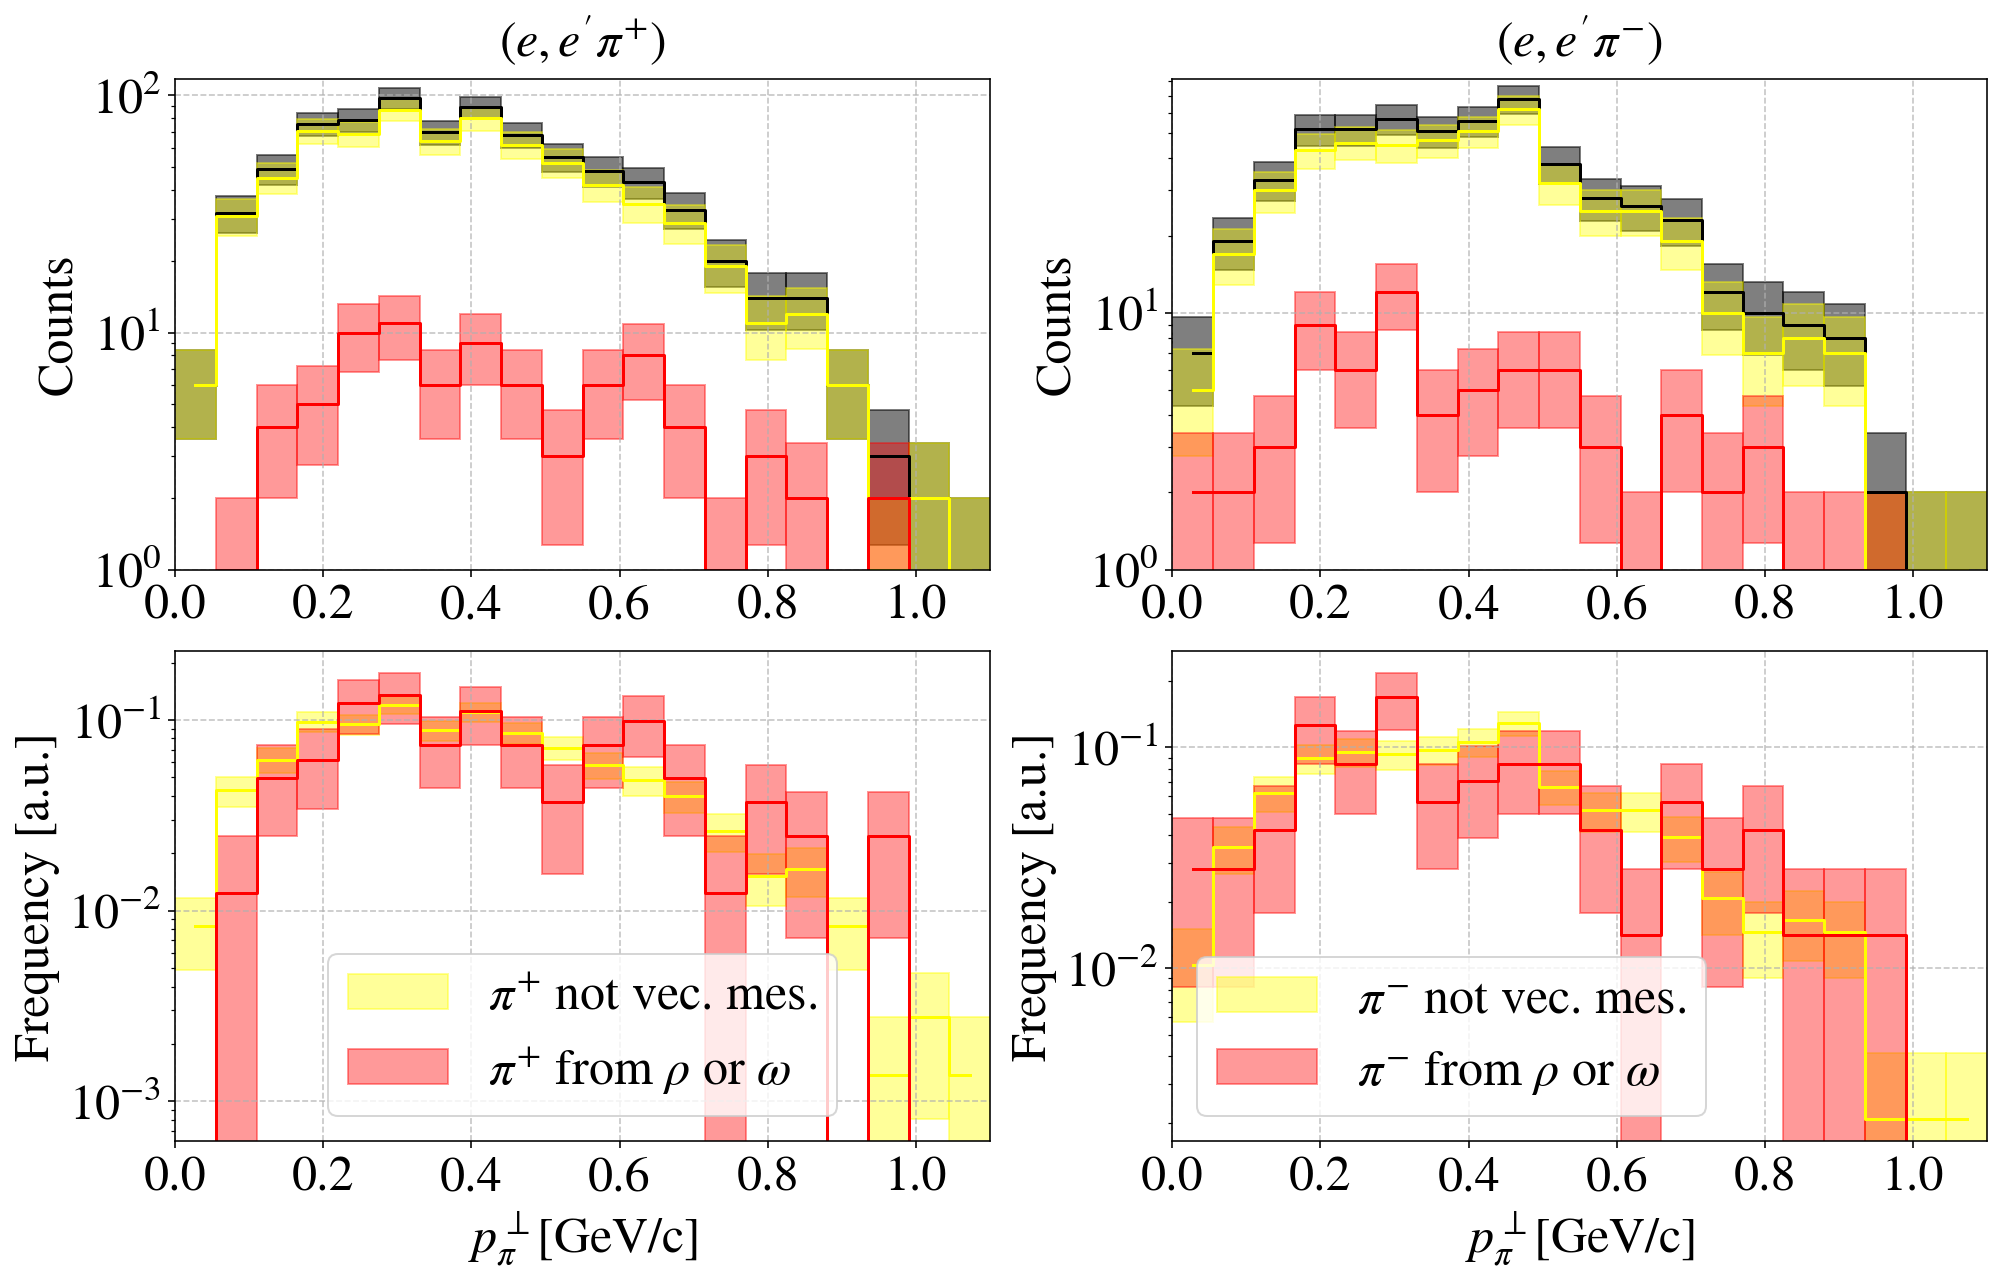

In [21]:
# Q2min, Q2max = 2.0, 2.5
# xBmin, xBmax = 0.2, 0.24

Q2min, Q2max = 3.0, 3.5
xBmin, xBmax = 0.24, 0.28

# Q2min, Q2max = 4.0, 4.5
# xBmin, xBmax = 0.28, 0.32

Zmin,  Zmax  = 0.4, 0.45

ax = plot_generator_pT(var  = 'pi_qFrame_pT', bins = np.linspace(0,1.1,21),varlabel = '$p_{\pi}^{\perp}$',varunits = '[GeV/c]', xlim=(0.,1.1),
                    Q2min=Q2min, Q2max=Q2max, xBmin=xBmin, xBmax=xBmax, Zmin=Zmin, Zmax=Zmax,
                     do_seperate_subplots=True, 
                     do_seperate_pi_parent=True,
                     do_save_figure=False )

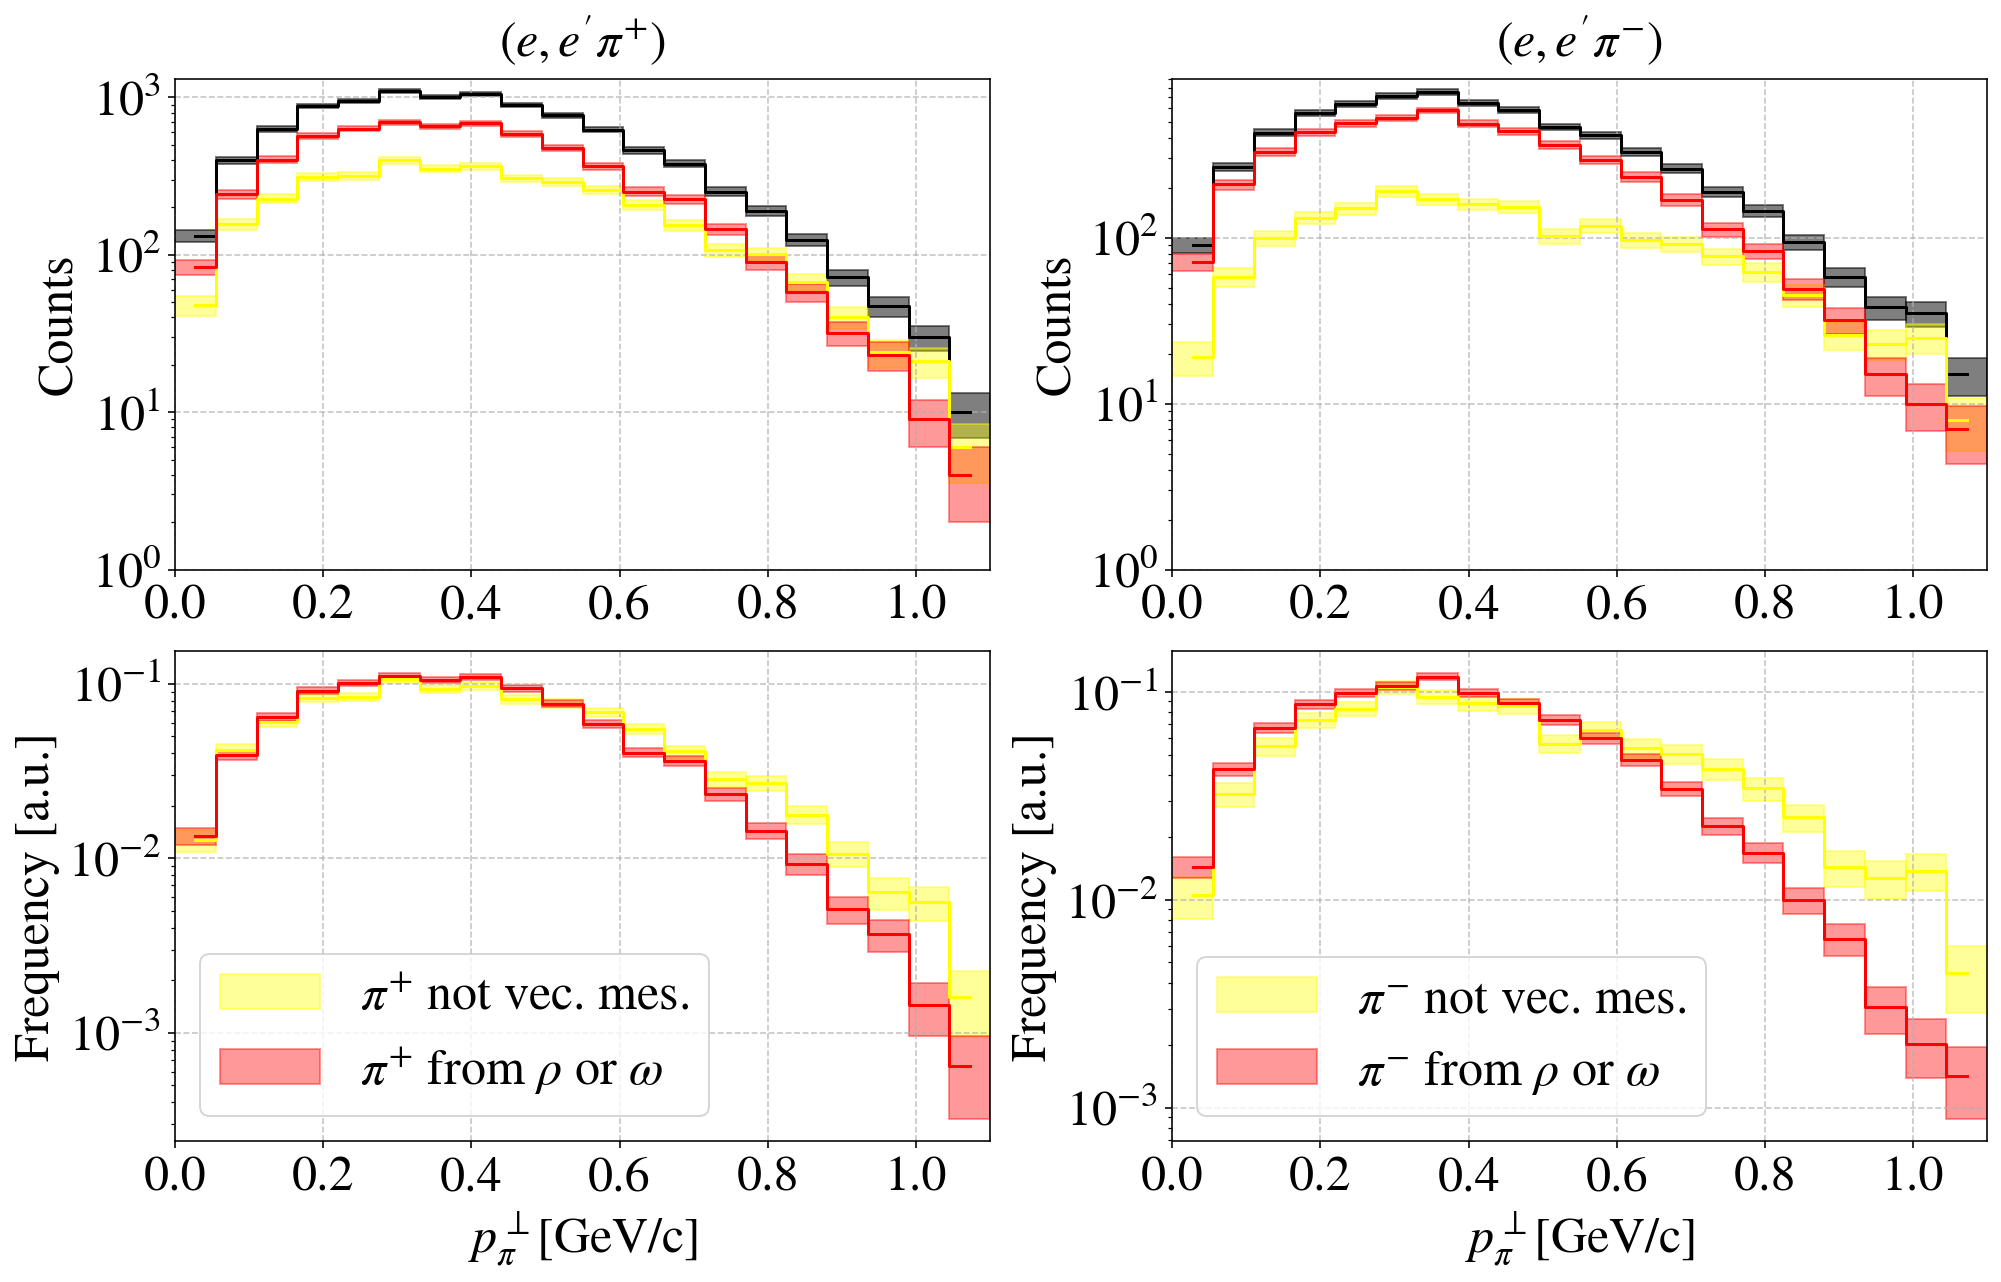

In [22]:
# Q2min, Q2max = 2.0, 2.5
# xBmin, xBmax = 0.2, 0.24

Q2min, Q2max = 3.0, 3.5
xBmin, xBmax = 0.24, 0.28

# Q2min, Q2max = 4.0, 4.5
# xBmin, xBmax = 0.28, 0.32

Zmin,  Zmax  = 0.4, 0.45

ax = plot_generator_pT(df_dict = e_e_pi_claspyth_pass_cuts,
                       var  = 'pi_qFrame_pT', bins = np.linspace(0,1.1,21),varlabel = '$p_{\pi}^{\perp}$',varunits = '[GeV/c]', xlim=(0.,1.1),
                    Q2min=Q2min, Q2max=Q2max, xBmin=xBmin, xBmax=xBmax, Zmin=Zmin, Zmax=Zmax,
                     do_seperate_subplots=True, 
                     do_seperate_pi_parent=True,
                     do_save_figure=False )

## (3.1) Integrated over kineamtics

In [23]:
ax = plot_clasdis_pT(var  = 'pi_qFrame_pT',                    
                    bins = np.linspace(0,1.3,21),                    
                    varlabel = '$p_{\pi}^{\perp}$', 
                    varunits = '[GeV/c]')
# ax[1].set_yscale('log')


NameError: name 'plot_clasdis_pT' is not defined